# Intro to Logistic Regression!

1. Let's apply to the teaching breast cancer dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#Take a look:
data['data'].shape

(569, 30)

In [8]:
#Target values?
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [9]:
#How many of each?
vals, counts = np.unique(data['target'], return_counts=True)
counts

array([212, 357], dtype=int64)

In [10]:
##Fairly balanced data
counts / counts.sum()

array([0.37258348, 0.62741652])

In [11]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
#Put into a DataFrame:
#######

df = pd.DataFrame(np.hstack((data['data'], data['target'].reshape(-1,1))),
             columns = list(data['feature_names']) + ['target'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


C:\Users\steff\AppData\Local\Temp\ipykernel_11784\2440607629.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax1, bins=20);


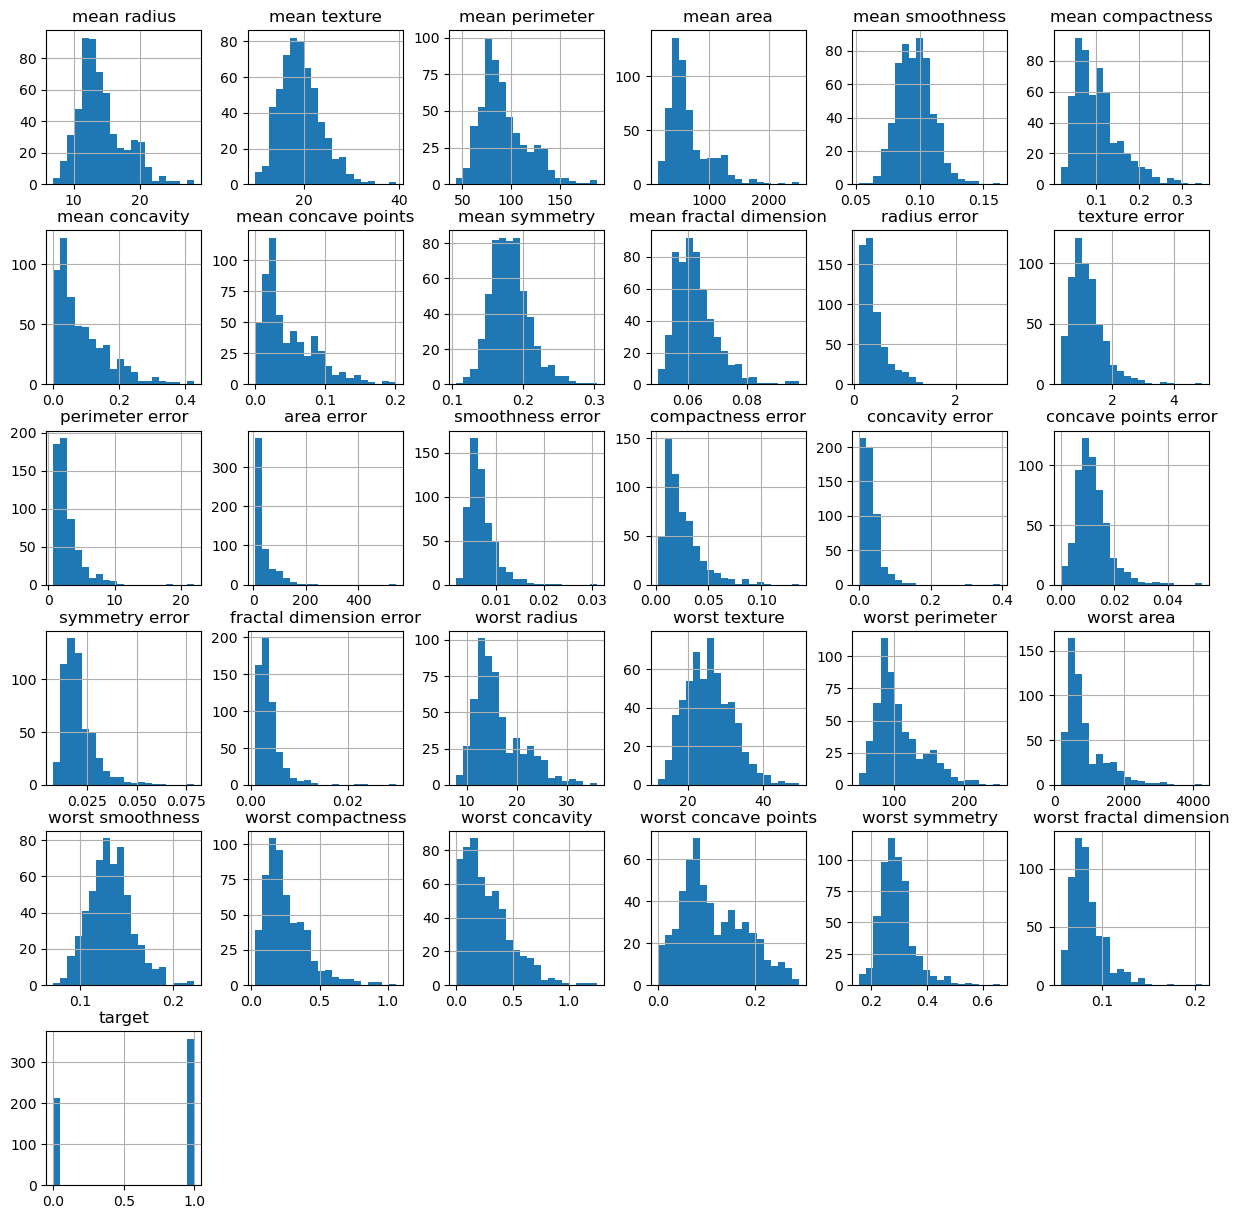

In [13]:
#Just look at all the distributions
#########

fig1, ax1 = plt.subplots(1, 1, figsize=(15,15))

df.hist(ax=ax1, bins=20);

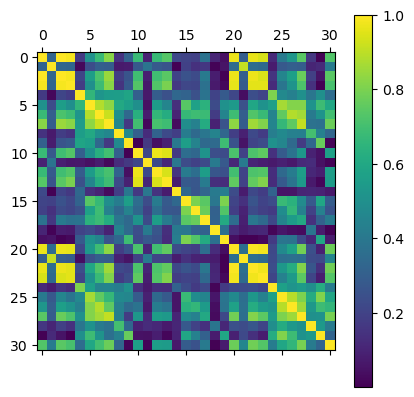

In [14]:
#Real quick visualization of correlation matrix:
plt.matshow(np.abs(df.corr()))
plt.colorbar()

<Axes: >

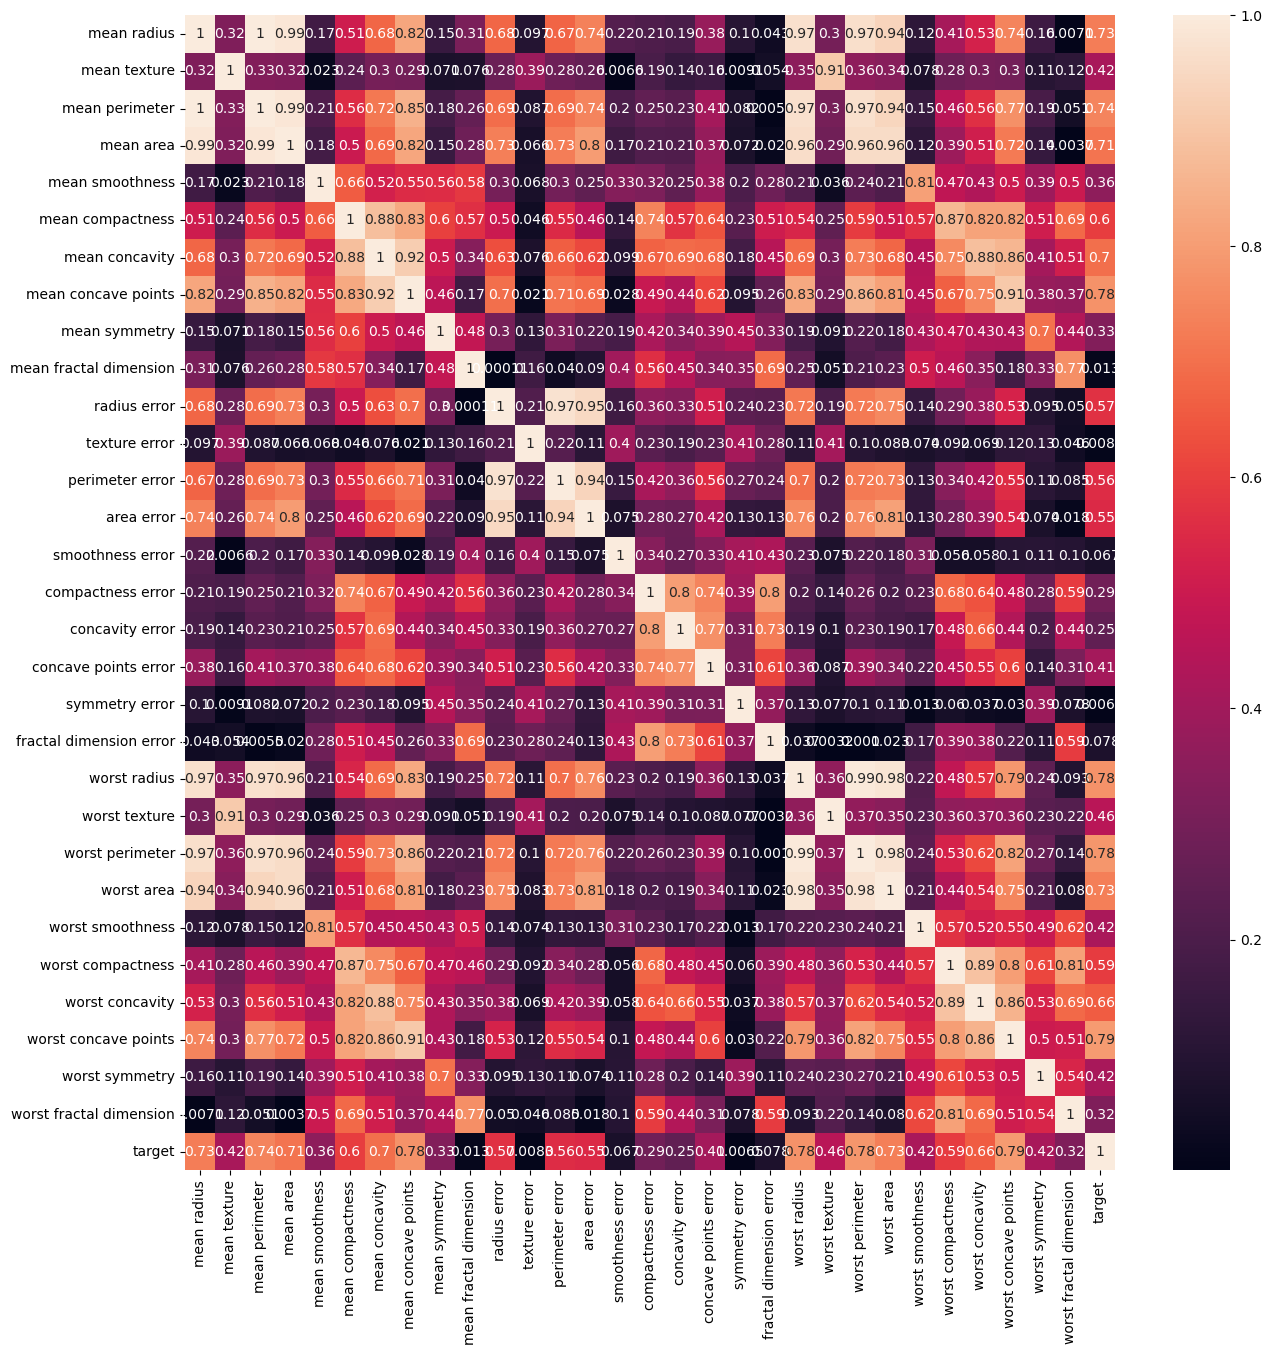

In [17]:
#Or:
fig, ax1 = plt.subplots(figsize=(15, 15))
sns.heatmap(np.abs(df.corr()), annot=True, ax=ax1)

## The Usual Tedium: Train/Test, Rescale

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:30]], df['target'], test_size=.3, random_state=42)
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [19]:
#Let's scale:
###
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

#Fit-transform
X_train_scaled = std_scaler.fit_transform(X_train)

#And transform testing:
X_test_scaled = std_scaler.transform(X_test)


#Back to DataFrame:
X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns,
                              index = X_train.index)

#Back to DataFrame:
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns,
                              index = X_test.index)
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,-0.123490,-0.296801,-0.170507,-0.208616,-1.201680,-0.773170,-0.762312,-0.933241,-1.229949,-0.948166,...,-0.197620,-0.506748,-0.307910,-0.273576,-1.507424,-0.449260,-0.572239,-0.840822,-0.856362,-0.765748
124,-0.228268,-0.657951,-0.253775,-0.296503,-1.804637,-0.587616,-0.091985,-0.542684,-1.419985,-0.612491,...,-0.422917,-0.458495,-0.465287,-0.438127,-1.273017,0.027042,0.318045,-0.377067,-1.341582,-0.414807
421,0.145534,-1.230564,0.245833,-0.010242,0.519184,1.570006,0.732320,0.386583,1.054201,1.574228,...,0.036022,-1.192272,0.203869,-0.127445,-0.024877,0.770802,0.272612,-0.047627,-0.089971,0.488264
195,-0.358532,-0.672207,-0.400937,-0.400014,-1.203862,-0.970650,-0.634704,-0.654992,0.096572,-0.827986,...,-0.502189,-0.583287,-0.501000,-0.493386,-0.959895,-0.663496,-0.470142,-0.493515,0.226547,-0.802899
545,-0.157472,0.967224,-0.208843,-0.241538,-0.254695,-0.700630,-0.750349,-0.637469,-0.518248,-0.642882,...,-0.195534,0.596414,-0.296107,-0.266734,-0.442374,-0.656085,-0.835138,-0.659802,-0.387208,-0.800613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.497494,-1.073749,-1.379543,-1.160029,0.135881,0.973654,-0.025866,-0.523567,0.368583,3.748516,...,-1.367290,-1.636531,-1.355982,-1.048088,-0.481514,-0.036959,-0.638602,-1.034066,-1.010604,1.421056
106,-0.718174,-0.197010,-0.704330,-0.689902,1.326521,-0.031346,-0.223452,-0.360813,-0.007761,0.350328,...,-0.656559,0.624700,-0.661404,-0.631799,1.610316,0.113949,0.095984,0.124773,-0.123711,0.424820
270,0.032261,-0.555784,-0.080644,-0.075809,-2.303586,-1.496809,-1.039653,-1.120156,-1.099533,-1.229967,...,-0.287322,-0.807912,-0.391138,-0.346027,-2.004940,-1.338808,-1.173282,-1.261790,-0.682839,-1.276726
435,-0.055526,0.109492,-0.046842,-0.168160,0.730110,0.195463,0.315536,0.429860,-0.499617,0.383481,...,0.157015,0.880940,0.197816,-0.022013,1.284147,0.725664,0.706523,1.079240,0.475584,1.255302


### Let's select some features...

- We'll (likely) revisit feature selection later

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=3)

selector.fit(X_train, y_train)

#For some reason, does not preserve feature names correctly
names = selector.get_feature_names_out()
names

array(['x7', 'x22', 'x27'], dtype=object)

In [21]:
#Extract the actual column names
col_index = [int(i[1:]) for i in names]
col_index

[7, 22, 27]

In [22]:
#And these were?
cols = df.columns[col_index]
cols

Index(['mean concave points', 'worst perimeter', 'worst concave points'], dtype='object')

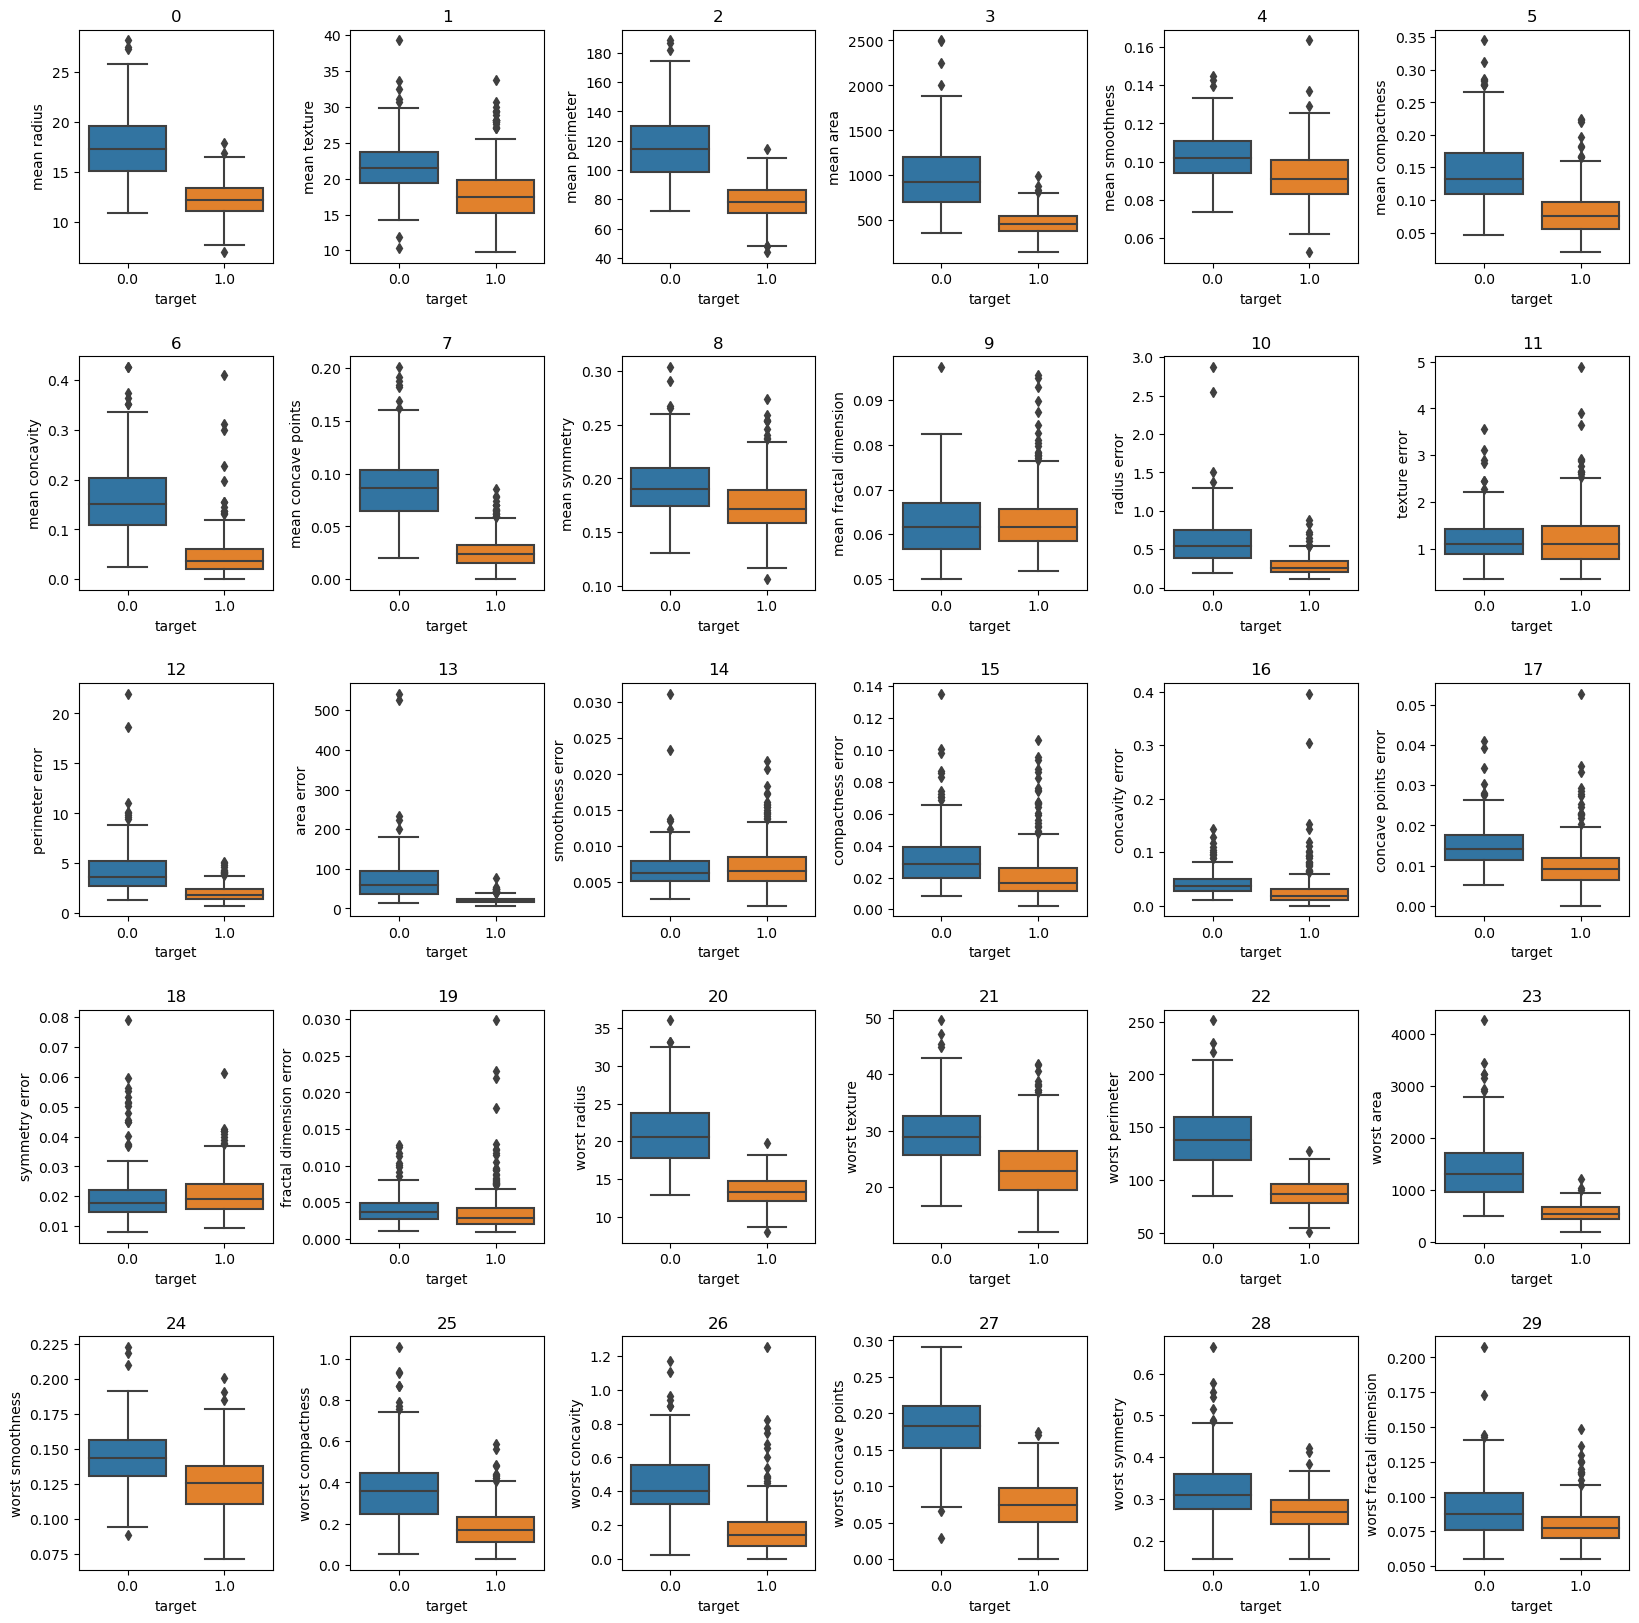

In [27]:
fig1, ax1 = plt.subplots(5, 6, figsize=(20,20))

ax1 = ax1.flatten()

for i in range(30):
    sns.boxplot(data=df, y=df[df.columns[i]], x='target', ax=ax1[i])
    ax1[i].set_title(str(i))
    
plt.subplots_adjust(wspace=.4, hspace=.4)

<Axes: xlabel='target', ylabel='worst concave points'>

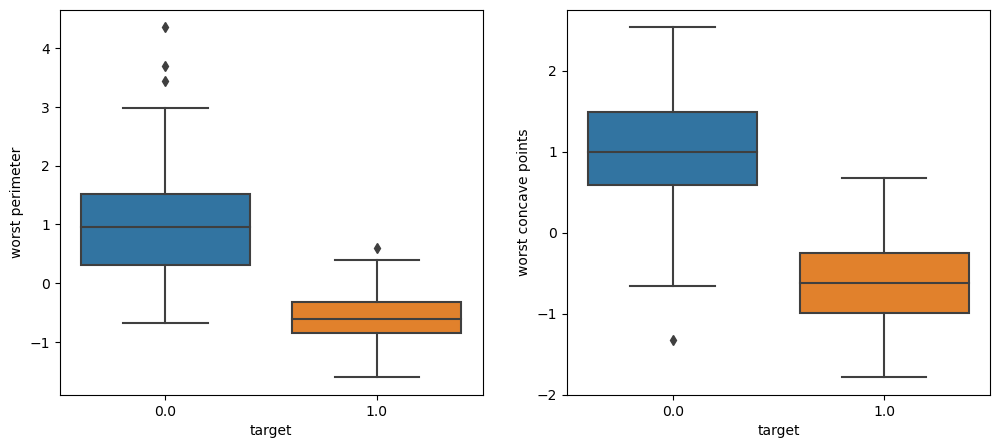

In [28]:
fig1, ax1 = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(y=X_train[cols[1]], x=y_train, ax=ax1[0])
sns.boxplot(y=X_train[cols[2]], x=y_train, ax=ax1[1])

<Axes: xlabel='worst concave points', ylabel='Density'>

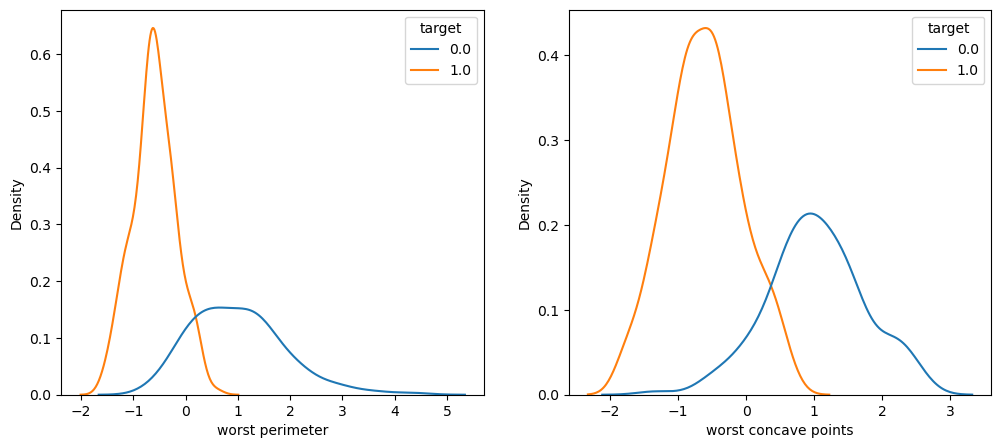

In [29]:
fig1, ax1 = plt.subplots(1, 2, figsize=(12,5))

sns.kdeplot(x=X_train[cols[1]], hue=y_train, ax=ax1[0])
sns.kdeplot(x=X_train[cols[2]], hue=y_train, ax=ax1[1])

<Axes: xlabel='worst perimeter', ylabel='worst concave points'>

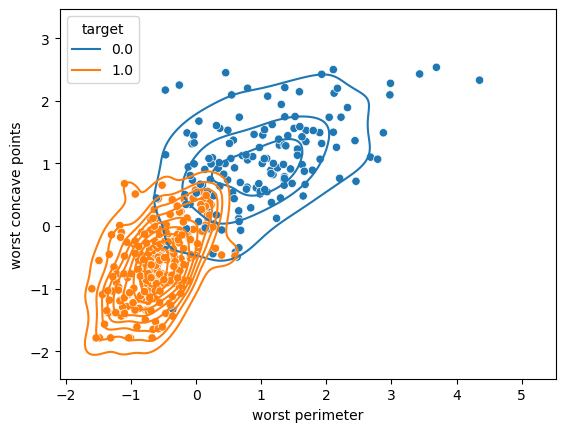

In [30]:
## And a kde plot + scatter plot:
####

sns.scatterplot(x=X_train[cols[1]], y=X_train[cols[2]], hue=y_train)
sns.kdeplot(x=X_train[cols[1]], y=X_train[cols[2]], hue=y_train)


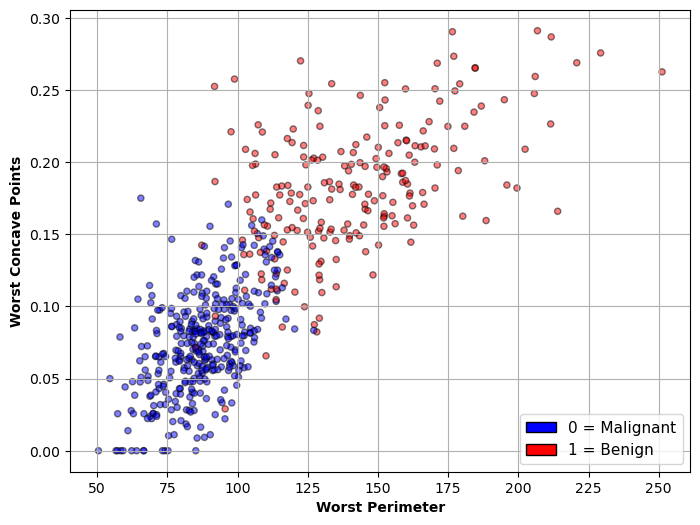

In [31]:
##Another scatter plot
#######
from matplotlib.colors import ListedColormap
my_cmap = (ListedColormap(["red", "blue"]))

fig1, ax1 = plt.subplots(1, 1, figsize=(8,6))

#Scatter Plot, color by malignancy
ax1.scatter(df[cols[1]], df[cols[2]], c = df['target'], cmap=my_cmap, alpha=.5, s=20, edgecolor='black')

ax1.set_xlabel('Worst Perimeter', fontweight='bold')
ax1.set_ylabel('Worst Concave Points', fontweight='bold')



#Custom Legend
#######

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', edgecolor='black', alpha=1, label='0 = Malignant'),
                   Patch(facecolor='red', edgecolor='black', alpha=1, label='1 = Benign')]

ax1.legend(handles=legend_elements, fontsize=11, loc='lower right');

ax1.grid()

## Let's Use a Single Predictor

- Let's visualize our logistic regression using a single predictor...
- First take a look at the data...

In [32]:
#Select a feature:
#We'll use "worst perimeter"
feature = X_train[cols[1]]

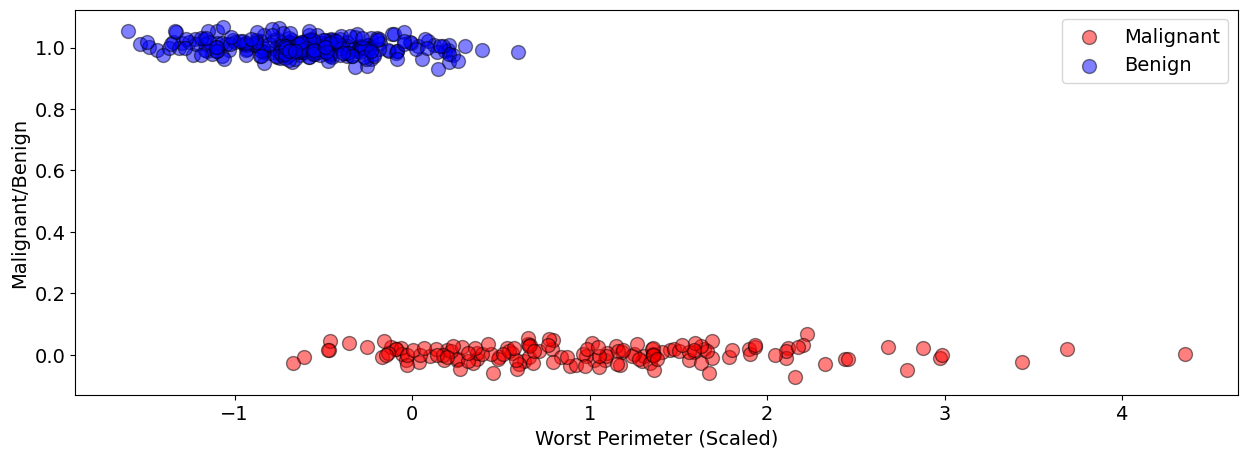

In [33]:
fig1, ax1 = plt.subplots(1, 1, figsize=(15,5))

#Plot the training data:

#Is Malignant? Add a jitter because many measurements overlap:
l1 = len(X_train.loc[y_train == 0])

ax1.scatter(feature.loc[y_train == 0], y_train.loc[y_train == 0] + np.random.normal(size=l1, scale=.025),
            color='red', s=100, alpha=.5, edgecolor='black', label='Malignant')


#Is Not? Also add a jitter because many measurements overlap:
l2 = len(X_train.loc[y_train == 1])
ax1.scatter(feature.loc[y_train == 1], y_train.loc[y_train == 1] + np.random.normal(size=l2, scale=.025),
            color='blue', s=100, alpha=.5, edgecolor='black', label='Benign')

#Some aesthetics:
####
ax1.legend(fontsize=14)
ax1.tick_params(axis='both', labelsize=14)

ax1.set_xlabel('Worst Perimeter (Scaled)', fontsize=14)
ax1.set_ylabel('Malignant/Benign', fontsize=14);

## Logistic Regression from scratch

Recall that our cost function is the binary cross entropy:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)} \ln{\left(\sigma(\mathbf{\theta}^T\mathbf{x}^{(i)}\right)} + (1-y^{(i)}) \ln{\left(1 - \sigma(\mathbf{\theta}^T\mathbf{x}^{(i)}\right)}
$$

and our gradient is basically the same as with linear regression:

$$
\frac{\partial E}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( \sigma( \mathbf{\theta}^T \mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)} = \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right) x_j^{(i)}
$$

Let's do our own logistic regression with just a single feature and a bias term:

In [34]:
#Let's do a logistic regression with two terms: bias, and a weight for the single feature here
#########

#Initial guess:
theta = [1, 1]

num_iters = 20000

alpha = .01

#Set x = feature, m = len(feature)
x = feature
m = len(x)
y = y_train

#Regularization parameter:
lambda1 = 0

for k in range(num_iters):
    
    #Get our predictions for current value of theta
    y_hat = 1 / (1 + np.exp(-(theta[0] + theta[1] * x)))
    
    #Get partial derivatives with respect to theta_0 and theta_1:
    #Note these are the same expressions as for linear regression, just a different method to get y_hat!
    dE_theta0 = 2 / m * np.sum(y_hat - y)
    
    #Add regularization if desired
    dE_theta1 = 2 / m * np.dot((y_hat - y).T, x) + 2/m*lambda1*theta[1]
    
    
    #Update theta:
    theta = theta - alpha * np.array([dE_theta0, dE_theta1])

#Final theta?
theta

array([ 0.45664645, -5.01380482])

In [35]:
#Get our final probabilities and predictions
########
#Prediction is for benign
y_proba = 1 / (1 + np.exp(-(theta[0] + theta[1] * x)))
y_pred = y_proba > .5

In [36]:
## Also: Get some probabilities for display purposes:
########

x_display = np.linspace(np.min(x), np.max(x), 1000)

y_proba_display = 1 / (1 + np.exp(-(theta[0] + theta[1] * x_display)))

0.09223874995873782


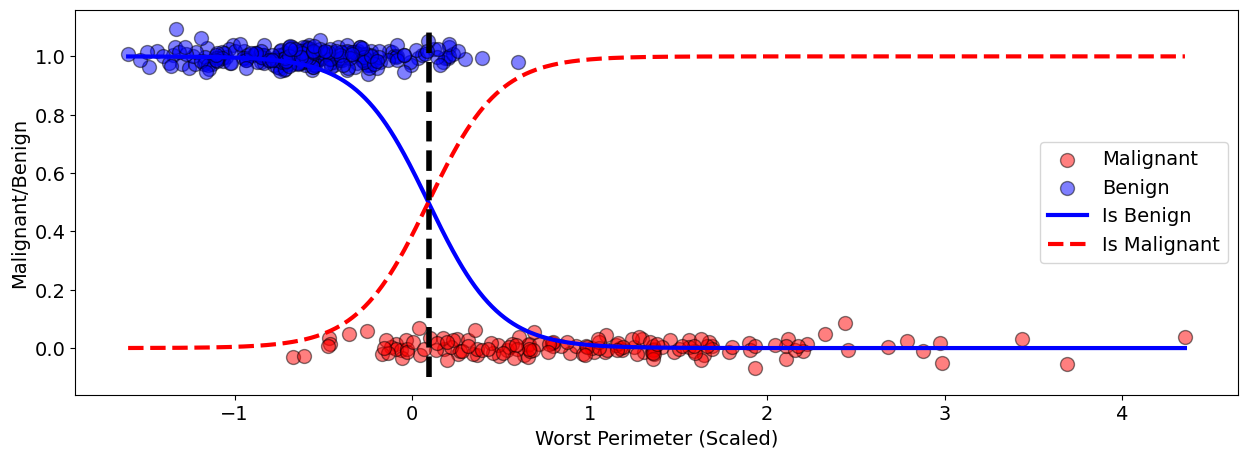

In [37]:
##Plot with the data:
########

fig1, ax1 = plt.subplots(1, 1, figsize=(15,5))

#Plot the training data:

#Is Malignant? Add a jitter because many measurements overlap:
l1 = len(X_train.loc[y_train == 0])
ax1.scatter(feature.loc[y_train == 0], y_train.loc[y_train == 0] + np.random.normal(size=l1, scale=.025),
            color='red', s=100, alpha=.5, edgecolor='black', label='Malignant')


#Is Not? Also add a jitter because many measurements overlap:
l2 = len(X_train.loc[y_train == 1])
ax1.scatter(feature.loc[y_train == 1], y_train.loc[y_train == 1] + np.random.normal(size=l2, scale=.025),
            color='blue', s=100, alpha=.5, edgecolor='black', label='Benign')


#Now, plot our probabilities
###########

#Is Benign?
ax1.plot(x_display, y_proba_display, '-b', linewidth=3, label='Is Benign')

#Is Benign
ax1.plot(x_display, 1 - y_proba_display, '--r', linewidth=3, label='Is Malignant')


##Add approximate decision boundary
####
for i in range(1000):
    if (y_proba_display[i] < .5):
        ax1.plot([x_display[i],x_display[i]], [-.1,1.1], '--k', linewidth=4)
        print(x_display[i])
        break

        
#Some aesthetics:
####
ax1.legend(fontsize=14)
ax1.tick_params(axis='both', labelsize=14)

ax1.set_xlabel('Worst Perimeter (Scaled)', fontsize=14)
ax1.set_ylabel('Malignant/Benign', fontsize=14);



#### Summarize Performance of Classifier on Training Data

- Let's switch our prediction to be for malignancy

In [38]:
#Prediction is now for malignancy:
y_proba = 1 - 1 / (1 + np.exp(-(theta[0] + theta[1] * x)))
y_pred = y_proba > .5

In [39]:
from sklearn import metrics

print(metrics.classification_report(1 - y, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       249
         1.0       0.89      0.85      0.87       149

    accuracy                           0.90       398
   macro avg       0.90      0.89      0.89       398
weighted avg       0.90      0.90      0.90       398



### Quick ROC and Precision-Recall Curves

In [40]:
## Functions adapted from previous lecture:

#Just a simple ROC Curve
####
def plot_roc(y_truth, y_prob, ax):

    from sklearn.metrics import roc_curve

    FPR, TPR, thresholds = roc_curve(y_truth, y_prob)

    ax.step(FPR, TPR, linewidth=2)
    ax.plot([0,1], [0,1], '--', color = 'black')

    fs = 12
    ax.set_xlabel('1 - Specifity = 1 - TNR = FPR', fontsize=fs)
    ax.set_ylabel('Sensitivity = TPR', fontsize=fs)
    ax.tick_params(axis='both', labelsize=fs)

    AUC = np.trapz(TPR, FPR)
    ax.set_title('ROC Curve, AUC = ' + str(round(AUC,4)))
    
    print('AUC = ' + str(round(AUC,4)))

#And precision-recall:
######
def plot_pr(y_truth, y_prob, ax):
    from sklearn.metrics import precision_recall_curve

    precisions, recalls, thresholds = precision_recall_curve(y_truth, y_prob)

    ax.step(recalls, precisions, linewidth=2)
    ax.grid()

    #Axis labels, etc.
    fs = 12
    ax.set_xlabel('Recall (Sensitivity)', fontsize=fs)
    ax.set_ylabel('Precision (PPV)', fontsize=fs)
    ax.tick_params(axis='both', labelsize=fs)

    ax.set_title('Precision-Recall Curve')
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 1])

    

AUC = 0.9674


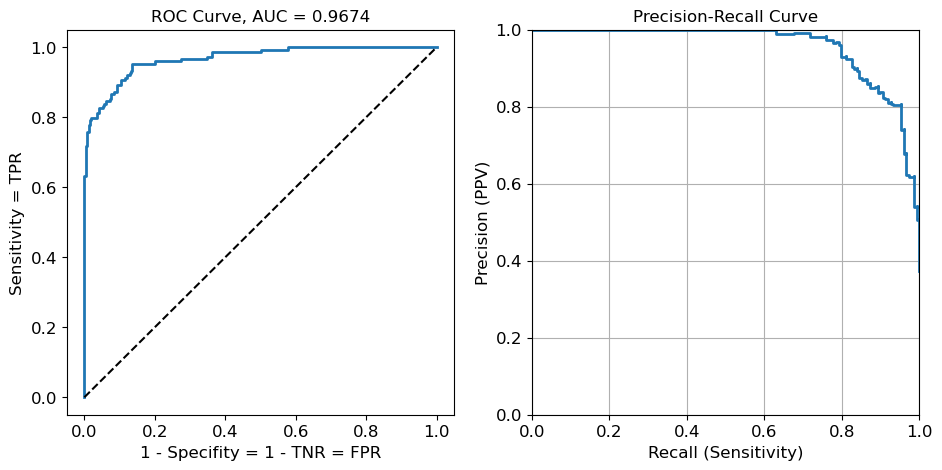

In [41]:
fig1, ax1 = plt.subplots(1, 2, figsize=(11,5))

plot_roc(1 - y, y_proba, ax1[0])
plot_pr(1 - y, y_proba, ax1[1])

## Scikit-Learn: Make the Logistic Regressor, etc.

In [42]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Make model:
#Set penalty = None for no regularization, default is 'l2'
lr_model = LogisticRegression(penalty=None)

#And fit:
lr_model.fit(x.values.reshape(-1,1), y_train)

LogisticRegression(penalty=None)

In [43]:
#Use x_display from above

#Continuous probability:
y_prob = lr_model.predict_proba(x_display.reshape(-1,1))

0.09223874995873782


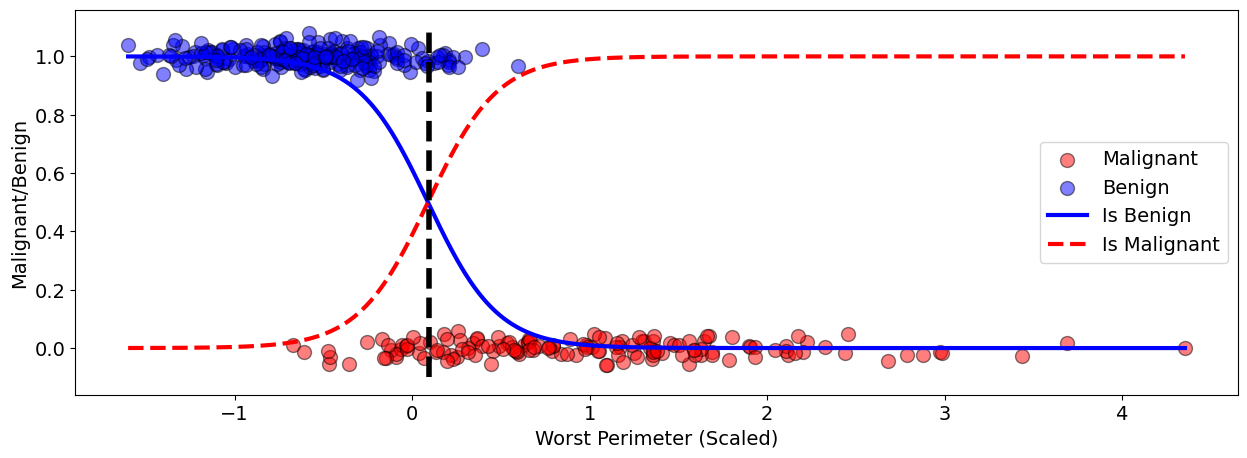

In [44]:
##Plot with the data:
########

fig1, ax1 = plt.subplots(1, 1, figsize=(15,5))

#Plot the training data:

#Is Malignant? Add a jitter because many measurements overlap:
l1 = len(X_train.loc[y_train == 0])
ax1.scatter(feature.loc[y_train == 0], y_train.loc[y_train == 0] + np.random.normal(size=l1, scale=.025),
            color='red', s=100, alpha=.5, edgecolor='black', label='Malignant')


#Is Not? Also add a jitter because many measurements overlap:
l2 = len(X_train.loc[y_train == 1])
ax1.scatter(feature.loc[y_train == 1], y_train.loc[y_train == 1] + np.random.normal(size=l2, scale=.025),
            color='blue', s=100, alpha=.5, edgecolor='black', label='Benign')


#Now, plot our probabilities
###########

#Is Benign?
ax1.plot(x_display, y_prob[:,1], '-b', linewidth=3, label='Is Benign')

#Is Malignant?
ax1.plot(x_display, y_prob[:,0], '--r', linewidth=3, label='Is Malignant')


##Add approximate decision boundary
####
for i in range(1000):
    if (y_prob[i,1] < .5):
        ax1.plot([x_display[i],x_display[i]], [-.1,1.1], '--k', linewidth=4)
        print(x_display[i])
        break

        
#Some aesthetics:
####
ax1.legend(fontsize=14)
ax1.tick_params(axis='both', labelsize=14)

ax1.set_xlabel('Worst Perimeter (Scaled)', fontsize=14)
ax1.set_ylabel('Malignant/Benign', fontsize=14);



## Now, Two Features + Scikit-Learn

In [45]:
##Grab 2 features:
####

X_train_2features = X_train[cols[1:3]]

#Now also grab for the testing set:
X_test_2features = X_test[cols[1:3]]

X_train_2features

,worst perimeter,worst concave points
149,-0.307910,-0.840822
124,-0.465287,-0.377067
421,0.203869,-0.047627
195,-0.501000,-0.493515
545,-0.296107,-0.659802
...,...,...
71,-1.355982,-1.034066
106,-0.661404,0.124773
270,-0.391138,-1.261790
435,0.197816,1.079240


In [46]:
#Make our model again:
lr_model = LogisticRegression()

#And fit again:
lr_model.fit(X_train_2features, y_train)

LogisticRegression()

In [47]:
#Range for contour:
x1 = np.min(X_test_2features.iloc[:,0])*1.025; x2 = np.max(X_test_2features.iloc[:,0])*1.025
y1 = np.min(X_test_2features.iloc[:,1])*1.025; y2 = np.max(X_test_2features.iloc[:,1])*1.025

#Points for contour
N = 75

X, Y = np.meshgrid(np.linspace(x1, x2, 200),
                         np.linspace(y1, y2, 200))

#Get as Nx2:
XY_ravel = np.c_[X.ravel(), Y.ravel()]


#Get the class:
Z = lr_model.predict(XY_ravel)

#And the probability:
Z_prob = lr_model.predict_proba(XY_ravel)[:,0]

#Reshape back:
Z = Z.reshape(X.shape)

Z_prob = Z_prob.reshape(X.shape)

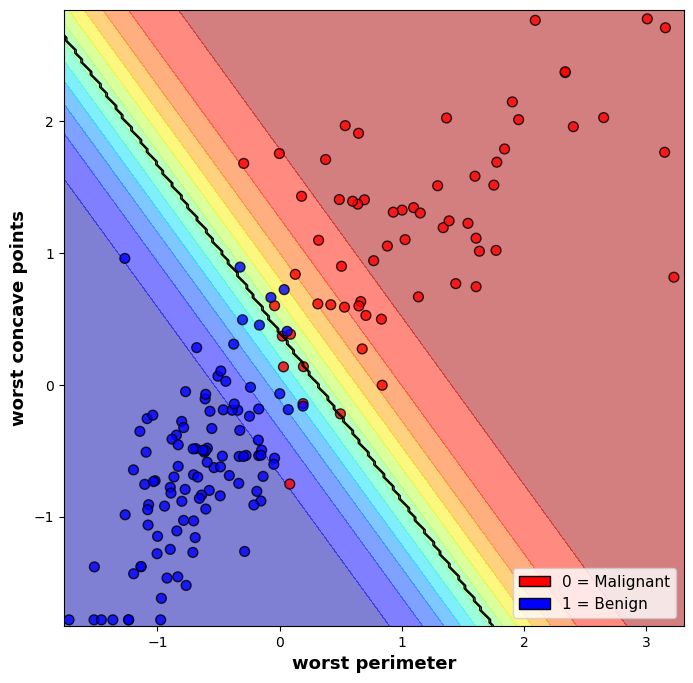

In [48]:
## And plot:
###
from matplotlib.colors import ListedColormap
my_cmap = (ListedColormap(["red", "blue"]))

fig1, ax1 = plt.subplots(1, 1, figsize=(8,8))

#ax1.contourf(X, Y, Z, 10, alpha=.5, my_cmap)
ax1.contourf(X, Y, Z_prob, 15, alpha=.5, cmap='jet')

ax1.contour(X, Y, Z, 1, alpha=1, linewidths=1, colors='black')

ax1.scatter(X_test_2features.iloc[:, 0], X_test_2features.iloc[:, 1], c = y_test, cmap=my_cmap, alpha=.8, s=50, edgecolor='black')

ax1.set_xlabel(cols[1], fontweight='bold', fontsize=13)
ax1.set_ylabel(cols[2], fontweight='bold', fontsize=13)


from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', edgecolor='black', alpha=1, label='0 = Malignant'),
                   Patch(facecolor='blue', edgecolor='black', alpha=1, label='1 = Benign')]

ax1.legend(handles=legend_elements, fontsize=11, loc='lower right');

AUC = 0.9929


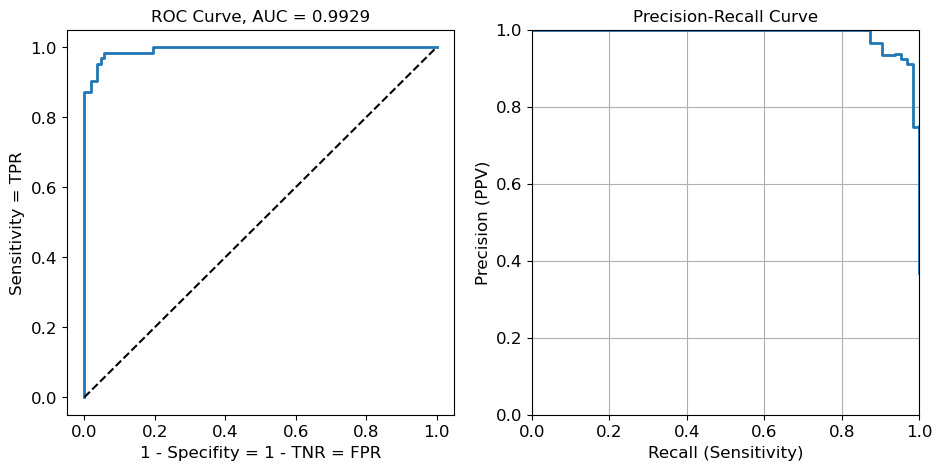

In [49]:
#ROC and Precision-Recall on Testing Set:
####

fig1, ax1 = plt.subplots(1, 2, figsize=(11,5))

plot_roc(1 - y_test, lr_model.predict_proba(X_test_2features)[:,0], ax1[0])
plot_pr(1 - y_test, lr_model.predict_proba(X_test_2features)[:,0], ax1[1])

## Data Not Linearly Separable?

- Can add polynomial features
- Behold...

In [50]:
from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


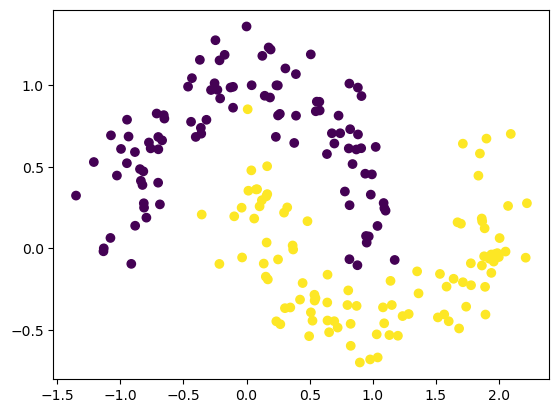

In [51]:
X, y = make_moons(n_samples=200, noise=.15, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y)

In [52]:
poly_lr_clf = make_pipeline(PolynomialFeatures(degree=3),
                            StandardScaler(),
                            LogisticRegression(C=10))

In [53]:
poly_lr_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=10))])

In [54]:
#Range for contour:
x1 = np.min(X[:,0])*1.025; x2 = np.max(X[:,0])*1.025
y1 = np.min(X[:,1])*1.025; y2 = np.max(X[:,1])*1.025

#Points for contour
N = 75

X1, Y1 = np.meshgrid(np.linspace(x1, x2, 200),
                         np.linspace(y1, y2, 200))

#Get as Nx2:
XY_ravel = np.c_[X1.ravel(), Y1.ravel()]


#Get the class:
Z = poly_lr_clf.predict(XY_ravel)

#And the probability:
Z_prob = poly_lr_clf.predict_proba(XY_ravel)[:,0]

#Reshape back:
Z = Z.reshape(X1.shape)

Z_prob = Z_prob.reshape(X1.shape)

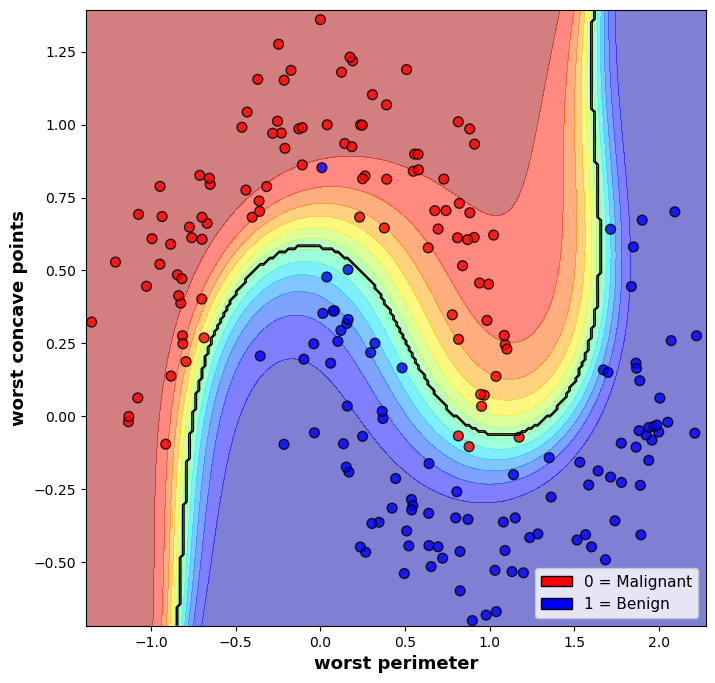

In [55]:
## And plot:
###
from matplotlib.colors import ListedColormap
my_cmap = (ListedColormap(["red", "blue"]))

fig1, ax1 = plt.subplots(1, 1, figsize=(8,8))

#ax1.contourf(X1, Y1, Z, 10, alpha=.5, my_cmap)
ax1.contourf(X1, Y1, Z_prob, 15, alpha=.5, cmap='jet')

ax1.contour(X1, Y1, Z, 1, alpha=1, linewidths=1, colors='black')

ax1.scatter(X[:, 0], X[:, 1], c = y, cmap=my_cmap, alpha=.8, s=50, edgecolor='black')

ax1.set_xlabel(cols[1], fontweight='bold', fontsize=13)
ax1.set_ylabel(cols[2], fontweight='bold', fontsize=13)


from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', edgecolor='black', alpha=1, label='0 = Malignant'),
                   Patch(facecolor='blue', edgecolor='black', alpha=1, label='1 = Benign')]

ax1.legend(handles=legend_elements, fontsize=11, loc='lower right');